In [1]:
import matplotlib.pyplot as plt
import pprint
import requests

from azure_cfg import cv_key
from skimage import io

%matplotlib inline

In [2]:
subscription_key = cv_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/"
vision_analyze_url = vision_base_url + "analyze?"

In [3]:
# evaluate an image using the Microsoft Azure Cognitive Services Computer Vision API
def analyze_image(image_url):
    image = io.imread(image_url)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
    headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
    params   = {'visualFeatures': 'Adult,Categories,Description,Color,Faces,ImageType,Tags'}
    data     = {'url': image_url}
    
    response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
    return analysis

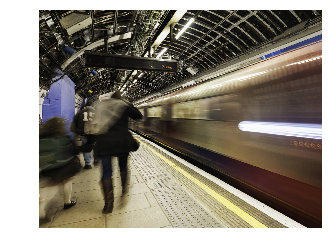

{'adult': {'adultScore': 0.013014059513807297,
           'isAdultContent': False,
           'isRacyContent': False,
           'racyScore': 0.01406136155128479},
 'categories': [{'name': 'trans_trainstation', 'score': 0.98828125}],
 'color': {'accentColor': '484B83',
           'dominantColorBackground': 'Black',
           'dominantColorForeground': 'Black',
           'dominantColors': ['Black'],
           'isBwImg': False},
 'description': {'captions': [{'confidence': 0.6548414048450634,
                               'text': 'a person waiting for a train at a '
                                       'train station'}],
                 'tags': ['train',
                          'platform',
                          'building',
                          'station',
                          'track',
                          'walking',
                          'subway',
                          'board',
                          'pulling',
                          'holding',
  

In [4]:
image_url = "https://oxfordportal.blob.core.windows.net/vision/Analysis/3.jpg"
data = analyze_image(image_url)
pprint.pprint(data)